# compute basic statistics on llc4320 native grid

In [1]:
import numpy as np
import xarray as xr

from matplotlib import pyplot as plt
%matplotlib inline

import mitequinox.utils as ut
import mitequinox.plot as pl

In [2]:
if True:
    from dask.distributed import Client, LocalCluster
    from dask_jobqueue import PBSCluster
    cluster = PBSCluster(walltime='06:00:00')
    w = cluster.scale(jobs=10)
    client = Client(cluster)
    client
else:
    from dask.distributed import Client, LocalCluster
    #
    cluster = LocalCluster()
    client = Client(cluster)
    client

---
# compute simple diagnostics


In [3]:
# same but over all variables and faces
V = ["Eta", "SSU", "SSV", "SST", "SSS"]
#V = V+["KPPhbl", "qsoceTAUX", "oceTAUY"]

In [5]:
client

Client Scheduler: tcp://10.148.0.39:49844 Dashboard: http://10.148.0.39:8787/status,Cluster Workers: 42 Cores: 42 Memory: 719.88 GB


In [ ]:
v = V[0]
ds = ut.load_data(v)
ds = ds.sel(face=1)
ds_mean = ds.mean("time")
%time ut.store_diagnostic("mean_"+v, ds_mean, overwrite=True)

In [4]:
for v in V:
    ds = ut.load_data(v)
    ds_mean = ds.mean("time")
    %time ut.store_diagnostic("mean_"+v, ds_mean, overwrite=True)
    ds_std = ds.std("time")
    %time ut.store_diagnostic("std_"+v, ds_std, overwrite=True)
    print("{} done".format(v))

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.


KeyboardInterrupt



Eta done


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.


KeyboardInterrupt



In [29]:
ds["Eta"].isel(time=slice(0,3), face=slice(0,4)).to_dataset().to_zarr("tmp", mode="w")

In [30]:
ds_bis = xr.open_zarr("tmp")

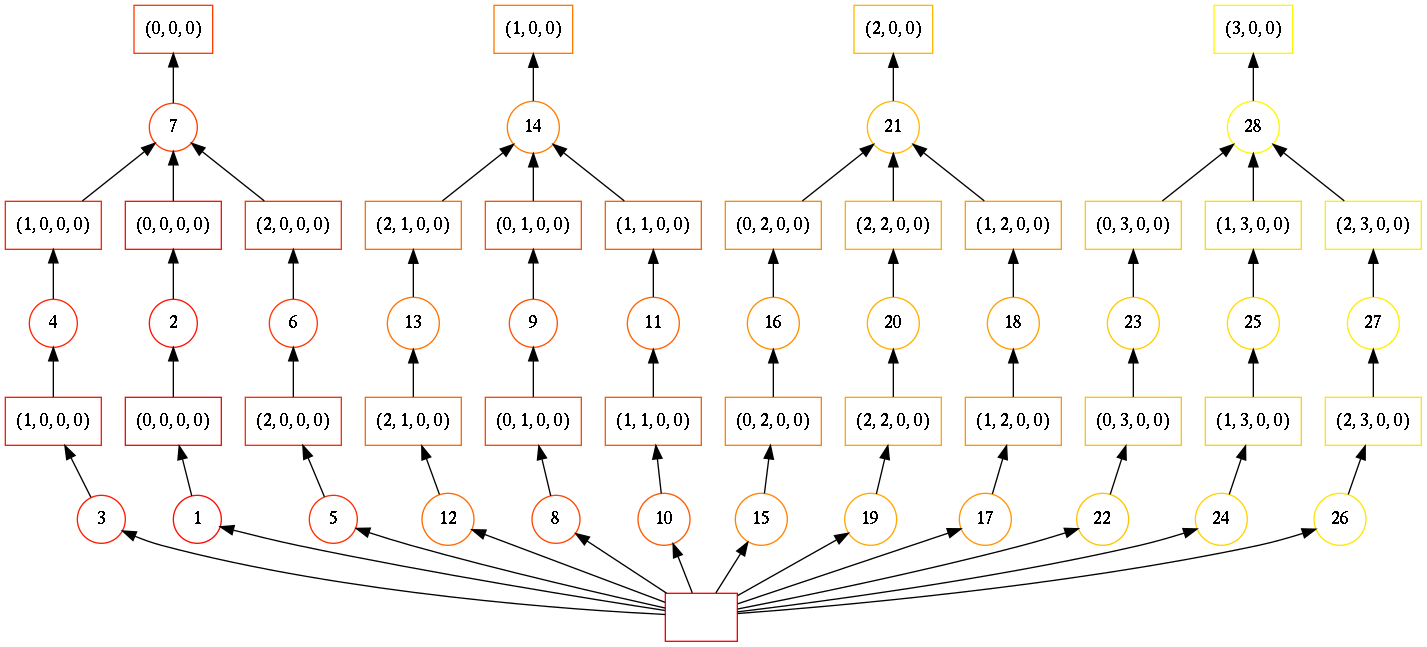

In [33]:
ds_bis.Eta.mean("time").data.visualize(color='order', cmap='autumn')

In [14]:
mean = ds["Eta"].isel(time=slice(0,2), face=1).mean("time")

In [15]:
mean.compute()

<xarray.DataArray 'Eta' (j: 4320, i: 4320)>
dask.array<mean_agg-aggregate, shape=(4320, 4320), dtype=float32, chunksize=(4320, 4320), chunktype=numpy.ndarray>
Coordinates:
    face     int64 1
  * i        (i) int64 0 1 2 3 4 5 6 7 ... 4313 4314 4315 4316 4317 4318 4319
  * j        (j) int64 0 1 2 3 4 5 6 7 ... 4313 4314 4315 4316 4317 4318 4319

In [16]:
mean.compute()

/home1/datahome/aponte/.miniconda3/envs/equinox/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


<xarray.DataArray 'Eta' (j: 4320, i: 4320)>
array([[-1.3825293 , -1.3822054 , -1.3816788 , ..., -1.2011023 ,
        -1.2020161 , -1.2029035 ],
       [-1.3838782 , -1.3835766 , -1.3831338 , ..., -1.2033072 ,
        -1.2042494 , -1.2051598 ],
       [-1.3849647 , -1.3846169 , -1.3842518 , ..., -1.2055001 ,
        -1.2063749 , -1.2072444 ],
       ...,
       [-0.513314  , -0.50885206, -0.50413597, ...,  0.18976231,
         0.19811334,  0.20215683],
       [-0.5136974 , -0.5086137 , -0.50307274, ...,  0.19097716,
         0.20099197,  0.20840359],
       [-0.51312   , -0.5067892 , -0.500229  , ...,  0.18920524,
         0.19927494,  0.20911698]], dtype=float32)
Coordinates:
    face     int64 1
  * i        (i) int64 0 1 2 3 4 5 6 7 ... 4313 4314 4315 4316 4317 4318 4319
  * j        (j) int64 0 1 2 3 4 5 6 7 ... 4313 4314 4315 4316 4317 4318 4319

In [ ]:
mean.data.visualize(filename='tree.svg')

In [20]:
mean.to_dataset().to_zarr("tmp")

/home1/datahome/aponte/.miniconda3/envs/equinox/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


In [21]:
mean2 = xr.open_zarr("tmp")

In [ ]:
mean2.Eta.mean("time").data.visualize()

In [19]:
mean

<xarray.DataArray 'Eta' (j: 4320, i: 4320)>
dask.array<mean_agg-aggregate, shape=(4320, 4320), dtype=float32, chunksize=(4320, 4320), chunktype=numpy.ndarray>
Coordinates:
    face     int64 1
  * i        (i) int64 0 1 2 3 4 5 6 7 ... 4313 4314 4315 4316 4317 4318 4319
  * j        (j) int64 0 1 2 3 4 5 6 7 ... 4313 4314 4315 4316 4317 4318 4319

In [3]:
# same but over all variables and faces
V = ["Eta", "SSU", "SSV", "SST", "SSS"]
#V = V+["KPPhbl", "oceTAUX", "oceTAUY"]

ds = ut.load_data(V)

In [ ]:
ds_mean = ds.mean("time").persist()
ut.store_diagnostic("mean", ds_mean, overwrite=True)

In [ ]:
ds_std = ds.std("time").persist()
ut.store_diagnostic("std", ds_std, overwrite=True)

---

# plots ...

In [ ]:
# load diagnostics
ds = ut.load_diagnostic ...

---

In [ ]:
client.restart()

In [3]:
cluster.close()